In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from ROOT import TFile,TTree
import healpy as hp
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from pylab import cm
from scipy.optimize import curve_fit
from array import array

from astropy.io import fits as pyfits
from astropy.wcs import wcs
import sys
import argparse
from importlib import reload
sys.path.append('/data/home/cwy/Science/3MLWCDA/Standard/src')
import mylib as my

In [42]:
# filein="/home/lhaaso/caowy/6_Source/GRS1915+105/20230419_20230430.root"
# filein="/home/lhaaso/caowy/6_Source/GRS1915+105/20230419_20230430_3.root"
# filein="/home/lhaaso/caowy/6_Source/GRS1915+105/20230419_20230430_4.root"
# filein="/home/lhaaso/caowy/6_Source/GRS1915+105/20221101_20221111.root"
# filein="/eos/user/c/caowy/5skymap/v220804_4h_0h/everyday/20230423_LST.root"
# filein="/eos/user/l/luoyu/wcda_skysurvey3/v220804_nocut_2022_0h/everyday/20220424_LST.root"
# filein="/eos/user/l/luoyu/wcda_skysurvey2/v220804_nocut_0h/everyday/20220402_LST.root"
# filein = "/eos/user/c/caowy/5skymap/ihep20230319-731/20230319_20230731_ihep.root"
# filein = "/eos/user/c/caowy/5skymap/ihep20230319-731/everyday/0508_LST.root"
# filein = "/eos/user/c/caowy/5skymap/ihep20210305-20230731_goodlist/everyday/20210305_LST.root"
# filein = "/eos/user/c/caowy/5skymap/20210305_20210310_ihep.root"
# filein = "/eos/user/c/caowy/5skymap/ihep20210305-20230731_goodlist/everyday/20210310_LST.root"
# filein = "/eos/user/c/caowy/5skymap/ihep20210305-20230731_goodlist_masknew_nq05t30/everyday/20210516_LST.root"
# filein = "/data/home/cwy/Science/3MLWCDA/data/WCDA_20240131_out.root"
filein = "/data/home/cwy/Science/3MLWCDA/data/KM2A_20240131_xsq1389.root"
nhit=9

In [47]:
file1=TFile.Open(filein)
nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix
signal=np.zeros(npix,dtype=np.float64)
background=np.zeros(npix,dtype=np.float64)
for ii in range(9,10): #nhit bin
    print("nHit%.2d"%ii)
    nHit0=file1.GetDirectory("nHit%.2d"%ii)
    T_signal=nHit0.Get("data")
    T_background=nHit0.Get("bkg")
    for iev in range(T_signal.GetEntries()):
        if(iev%1000000==0):
            print(iev,T_signal.count)
        T_signal.GetEntry(iev)
        signal[iev]+=T_signal.count
        T_background.GetEntry(iev)
        background[iev]+=T_background.count

nHit09
0 0.0
1000000 0.0
2000000 0.0
3000000 0.0
4000000 0.0
5000000 0.0
6000000 0.0
7000000 0.0
8000000 0.0
9000000 0.0
10000000 0.0
11000000 0.0
12000000 0.0


In [48]:
pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside 
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
mask = ((-new_lats + np.pi/2 < -20./180*np.pi) | (-new_lats + np.pi/2 > 80./180*np.pi)  )  # mask dec > 80 && dec<-20

signal[mask]=hp.UNSEEN
background[mask]=hp.UNSEEN

signal=hp.ma(signal)
background=hp.ma(background)

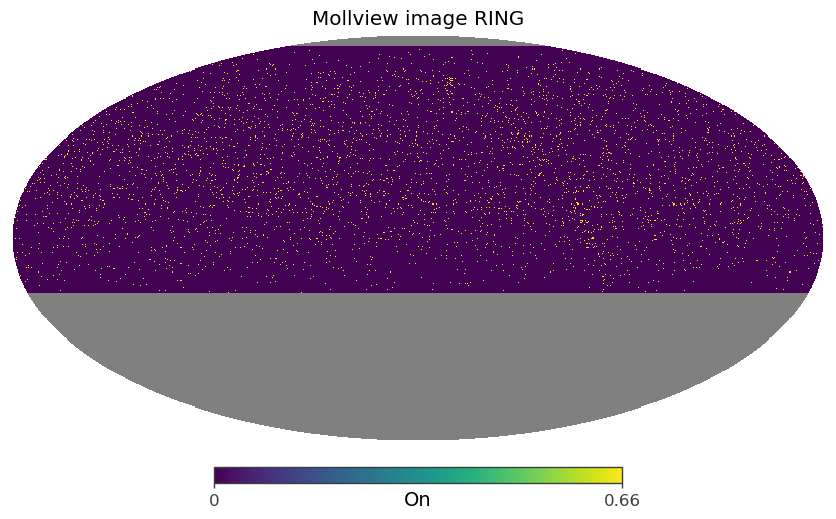

In [49]:
%matplotlib inline
hp.mollview(signal,title="Mollview image RING",norm='hist',unit='On')

In [52]:
np.ma.sum(signal)

28310.92002205737

masked_array(
  data=[[5.36441780e-09, 5.36441780e-09, 5.36441780e-09, ...,
         7.13704875e-58, 7.13704875e-58, 7.13704875e-58],
        [1.49011559e-08, 1.49011559e-08, 5.36441780e-09, ...,
         6.39468990e-38, 7.13704875e-58, 7.13704875e-58],
        [1.49011559e-08, 1.49011559e-08, 1.49011559e-08, ...,
         6.39468990e-38, 6.39468990e-38, 6.39468990e-38],
        ...,
        [3.43322739e-07, 3.43322739e-07, 3.43322739e-07, ...,
         4.69999850e-01, 3.49999964e-01, 3.49999964e-01],
        [3.43322739e-07, 3.43322739e-07, 3.43322739e-07, ...,
         4.69999850e-01, 4.69999850e-01, 4.69999850e-01],
        [3.62396293e-07, 3.62396293e-07, 3.62396293e-07, ...,
         1.80000022e-01, 1.80000022e-01, 4.69999850e-01]],
  mask=False,
  fill_value=-1.6375e+30)

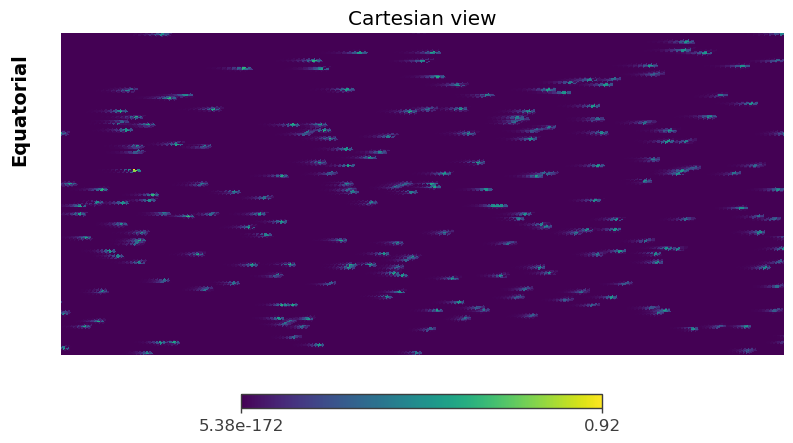

In [60]:
# ra,dec=ra1,dec1=ra_J0057, dec_J0057
ra,dec = ra_J0057, dec_J0057 =  14,63.5
rad=6
rot=0.1
coord="C"
xsize=1000
hp.cartview(signal,fig=2,lonra=[ra-rad/np.cos(np.radians(dec)),ra+rad/np.cos(np.radians(dec))],latra=[dec-rad,dec+rad],return_projected_map=True, rot=rot, coord=coord, xsize=xsize)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


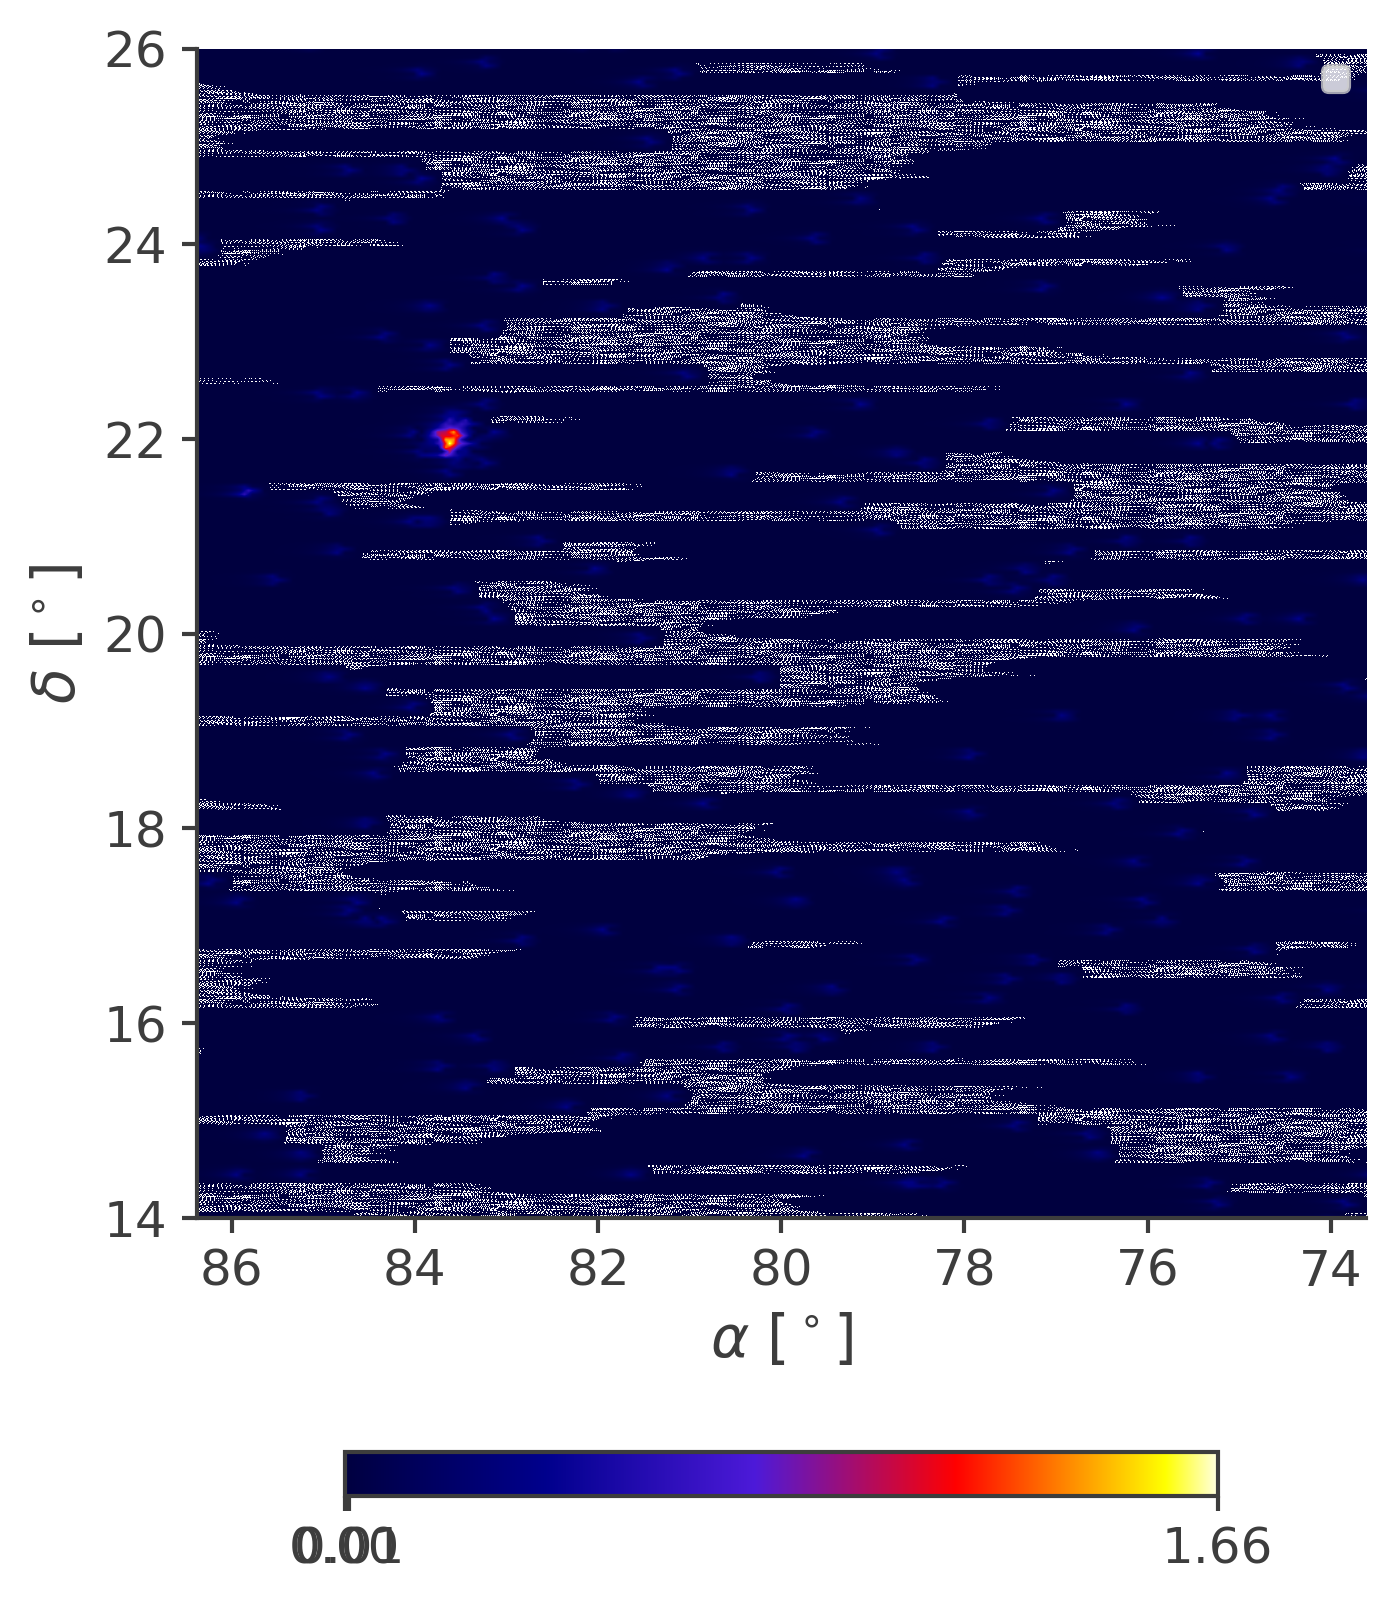

In [56]:
%matplotlib inline
# ra_J0057, dec_J0057 =  14,63.5
# ra_J0057, dec_J0057 =  80,20
ra1,dec1=ra_J0057, dec_J0057
fig = my.drawmap("region_name", "Modelname", {}, signal, ra1, dec1, rad=2*6, contours=[10000],save=1, 
                cat={ }, #
                # cat={ "LHAASO": [0, "P"],"TeVCat": [0, "s"],"PSR": [0, "*"],"SNR": [0, "o"],"3FHL": [0, "D"], "size": 20 ,"color": "grey"}, #2*data_radius
                # color="Milagro"
                #  cat = { "LHAASO": [0, "P"],"TeVCat": [0, "s"],"PSR": [0, "*"],"SNR": [0, "o"],"3FHL": [0, "D"],"4FGL": [0, "d"],"size": 20,"markercolor": "grey","labelcolor": "black","angle": 60,"catext": 1 },
                  color="Fermi",
                  #Drawdiff=1 # ,legend=0
                  )